In [63]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [64]:
# from google.colab import drive
# drive.mount('/content/drive')

## Loading the data

First we'll load the dataframe and prepare it to train our machine learning model. The model choosed was Random Forest (procurar citações).

In [65]:
# data_dir = '/content/drive/MyDrive/TELECOM/IMA205/Challenge'
data_dir ='./'

In [66]:
submission_dir = data_dir +'/Submissions/'

In [67]:
df_raw_train = pd.read_csv(data_dir+'/train_features.csv', index_col=0)
df_raw_train.head(5)

,ID,ED RV perimeter (mm),ED LV perimeter (mm),ED MYO perimeter (mm),ES RV perimeter (mm),ES LV perimeter (mm),ES MYO perimeter (mm),ES MYO thickness (mm),ED MYO thickness (mm),ED RV volume (ml),...,ES RV volume (ml),ES LV volume (ml),ES MYO volume (ml),ED MYO mass (g),ES MYO mass (g),EF RV,EF LV,HEIGHT,WEIGHT,CATEGORY
0,1,29.699931,24.848048,56.612309,24.995892,22.224334,52.226580,30.002245,31.764261,139.721680,...,59.545898,225.610352,195.068359,165.079102,196.043701,0.573825,0.236533,184.0,95.0,2
1,2,27.021604,27.230687,61.975589,24.189777,23.986349,56.930619,32.944269,34.744902,94.432068,...,28.823090,188.303375,192.565155,161.235746,193.527981,0.694774,0.291412,160.0,70.0,2
2,3,28.838233,23.481578,54.213674,28.092386,22.674492,52.863199,30.188707,30.732096,192.333984,...,174.584961,241.088867,201.074219,192.804932,202.079590,0.092282,0.128728,165.0,77.0,2
3,4,28.256226,25.786982,59.538337,27.114835,24.381894,57.403399,33.021504,33.751355,106.264114,...,84.543991,226.472473,174.957275,169.294716,175.832062,0.204398,0.131781,159.0,46.0,2
4,5,32.812421,28.015151,63.885449,29.497474,23.031420,56.409851,33.378432,35.870297,170.463867,...,74.553223,224.094727,232.261963,202.399541,233.423273,0.562645,0.229378,165.0,77.0,2


In [68]:
df_raw_test = pd.read_csv(data_dir+'/test_features.csv', index_col=0)
df_raw_test.head(5)

,ID,ED RV perimeter (mm),ED LV perimeter (mm),ED MYO perimeter (mm),ES RV perimeter (mm),ES LV perimeter (mm),ES MYO perimeter (mm),ES MYO thickness (mm),ED MYO thickness (mm),ED RV volume (ml),...,ED MYO volume (ml),ES RV volume (ml),ES LV volume (ml),ES MYO volume (ml),ED MYO mass (g),ES MYO mass (g),EF RV,EF LV,HEIGHT,WEIGHT
0,101,24.738822,21.439870,49.268560,22.559610,20.275857,46.776694,26.500837,27.828690,143.329510,...,153.584635,84.921052,194.309058,149.924013,154.352558,150.673633,0.407512,0.301365,167.0,89.0
1,102,25.693751,13.568728,29.986250,22.526648,10.494856,24.777439,14.282583,16.417521,169.334610,...,42.457528,98.704197,33.127915,43.250333,42.669816,43.466585,0.417106,0.551810,137.0,35.0
2,103,28.015151,16.285673,38.757708,24.266042,10.906397,31.352720,20.446323,22.472035,172.412109,...,113.867188,94.458008,41.748047,128.100586,114.436523,128.741089,0.452138,0.667380,167.0,116.0
3,104,28.360768,18.140919,45.091914,22.734761,10.813166,34.240131,23.426965,26.950995,147.985239,...,119.629346,55.197728,19.925763,143.349602,120.227492,144.066350,0.627005,0.815603,160.0,98.0
4,105,25.018514,16.005981,37.204776,24.475125,11.131476,28.487931,17.356455,21.198795,222.480845,...,95.915223,167.480013,50.810293,108.033810,96.394799,108.573980,0.247216,0.582771,174.0,64.0


In [69]:
#obtaining the columns names
train_cols = df_raw_train.columns
test_cols = df_raw_test.columns

In [70]:
#removing the ID of the dataset
df_train = df_raw_train[train_cols[1:]].copy()
df_test = df_raw_test[test_cols[1:]].copy()

In [71]:
df_train.head(2)

,ED RV perimeter (mm),ED LV perimeter (mm),ED MYO perimeter (mm),ES RV perimeter (mm),ES LV perimeter (mm),ES MYO perimeter (mm),ES MYO thickness (mm),ED MYO thickness (mm),ED RV volume (ml),ED LV volume (ml),...,ES RV volume (ml),ES LV volume (ml),ES MYO volume (ml),ED MYO mass (g),ES MYO mass (g),EF RV,EF LV,HEIGHT,WEIGHT,CATEGORY
0,29.699931,24.848048,56.612309,24.995892,22.224334,52.226580,30.002245,31.764261,139.721680,295.507812,...,59.545898,225.610352,195.068359,165.079102,196.043701,0.573825,0.236533,184.0,95.0,2
1,27.021604,27.230687,61.975589,24.189777,23.986349,56.930619,32.944269,34.744902,94.432068,265.744400,...,28.823090,188.303375,192.565155,161.235746,193.527981,0.694774,0.291412,160.0,70.0,2


In [72]:
df_test.head(2)

,ED RV perimeter (mm),ED LV perimeter (mm),ED MYO perimeter (mm),ES RV perimeter (mm),ES LV perimeter (mm),ES MYO perimeter (mm),ES MYO thickness (mm),ED MYO thickness (mm),ED RV volume (ml),ED LV volume (ml),ED MYO volume (ml),ES RV volume (ml),ES LV volume (ml),ES MYO volume (ml),ED MYO mass (g),ES MYO mass (g),EF RV,EF LV,HEIGHT,WEIGHT
0,24.738822,21.439870,49.26856,22.559610,20.275857,46.776694,26.500837,27.828690,143.32951,278.12654,153.584635,84.921052,194.309058,149.924013,154.352558,150.673633,0.407512,0.301365,167.0,89.0
1,25.693751,13.568728,29.98625,22.526648,10.494856,24.777439,14.282583,16.417521,169.33461,73.91489,42.457528,98.704197,33.127915,43.250333,42.669816,43.466585,0.417106,0.551810,137.0,35.0


In [73]:
df_train['CATEGORY'].value_counts()

2    20
3    20
1    20
0    20
4    20
Name: CATEGORY, dtype: int64

## Pre-processing

Now, we'll get the entries and the desired outputs for train (X_train,y_train) and the entries for the test

the minimum value of our train data: 
ED RV perimeter (mm)      19.918930
ED LV perimeter (mm)      10.549469
ED MYO perimeter (mm)     28.201613
ES RV perimeter (mm)      14.803350
ES LV perimeter (mm)       7.964373
ES MYO perimeter (mm)     23.761270
ES MYO thickness (mm)     14.973816
ED MYO thickness (mm)     16.456139
ED RV volume (ml)         47.365570
ED LV volume (ml)         49.267578
ED MYO volume (ml)        32.645727
ES RV volume (ml)         10.319305
ES LV volume (ml)         19.364365
ES MYO volume (ml)        36.950366
ED MYO mass (g)           32.808956
ES MYO mass (g)           37.135118
EF RV                      0.019169
EF LV                      0.104767
HEIGHT                   140.000000
WEIGHT                    35.000000
dtype: float64


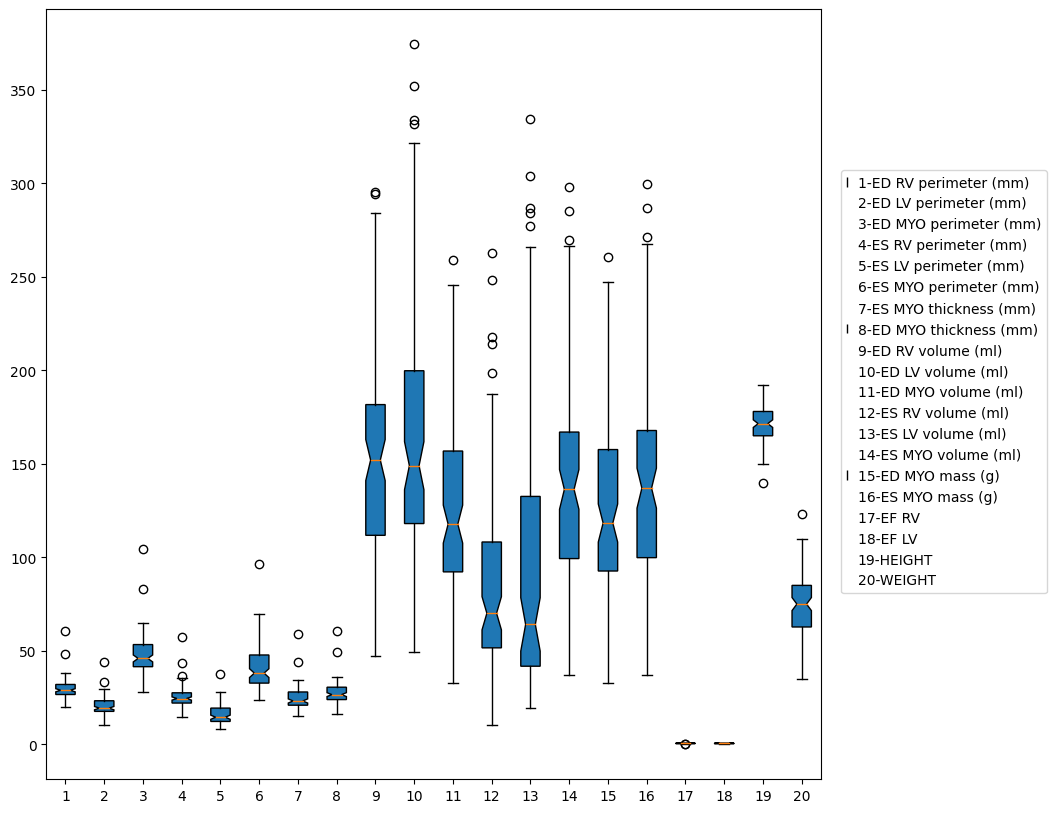

In [11]:
plt.figure(figsize=(10,10))
plt.boxplot(df_train[train_cols[1:-1]], notch=True, patch_artist=True);
legends = [f"{i+1}-{col}" for i, col in enumerate(train_cols[1:-1])]
plt.legend(legends, loc='upper right',  bbox_to_anchor=(1.3, .8), handlelength=0, markerscale=0)

print(f"the minimum value of our train data: \n{df_train[train_cols[1:-1]].min()}")

the minimum value of our test data: 
ED RV perimeter (mm)      21.028330
ED LV perimeter (mm)      13.568728
ED MYO perimeter (mm)     29.986250
ES RV perimeter (mm)      17.356455
ES LV perimeter (mm)       8.600993
ES MYO perimeter (mm)     24.777439
ES MYO thickness (mm)     14.282583
ED MYO thickness (mm)     16.417521
ED RV volume (ml)         59.761230
ED LV volume (ml)         73.914890
ED MYO volume (ml)        42.457528
ES RV volume (ml)         30.988037
ES LV volume (ml)         19.925763
ES MYO volume (ml)        43.250333
ED MYO mass (g)           42.669816
ES MYO mass (g)           43.466585
EF RV                      0.116213
EF LV                      0.075661
HEIGHT                   137.000000
dtype: float64


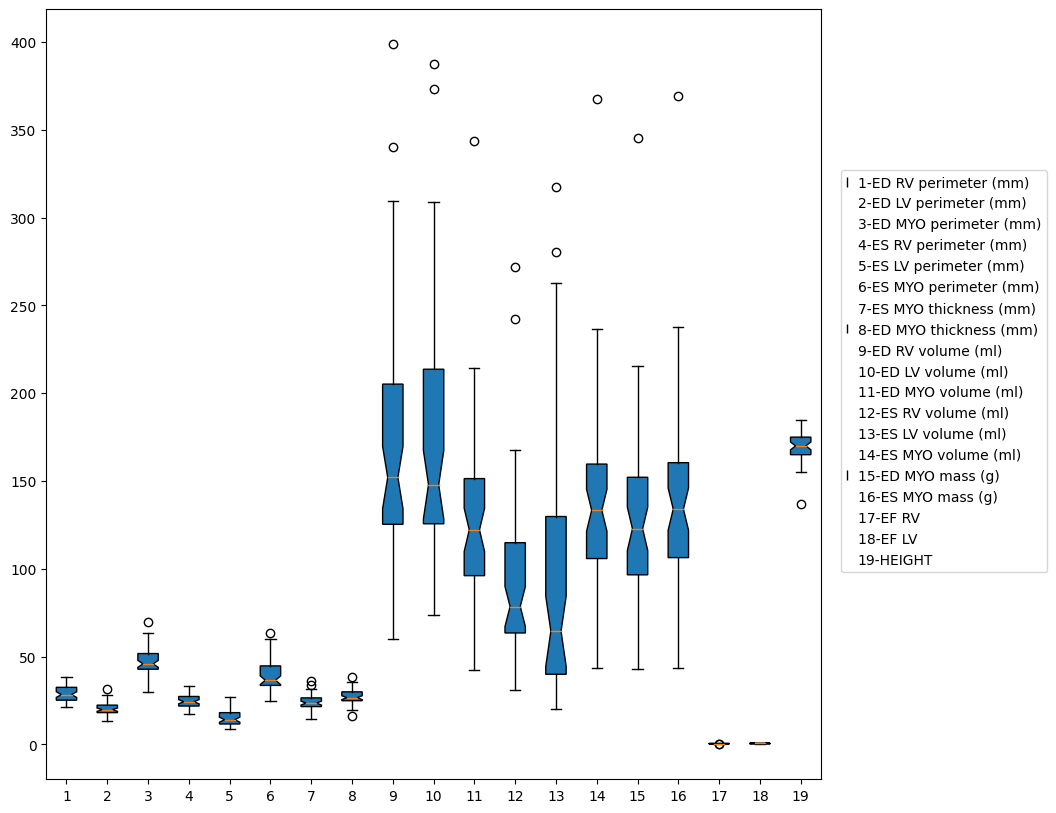

In [12]:
plt.figure(figsize=(10,10))
plt.boxplot(df_test[test_cols[1:-1]], notch=True, patch_artist=True);
legends = [f"{i+1}-{col}" for i, col in enumerate(test_cols[1:-1])]
plt.legend(legends, loc='upper right',  bbox_to_anchor=(1.3, .8), handlelength=0, markerscale=0)

print(f"the minimum value of our test data: \n{df_test[test_cols[1:-1]].min()}")


In [13]:
#train data
X_train = df_train[train_cols[1:-1]]
y_train = df_train[train_cols[-1]]
#test data
X_test = df_test

We can see that there are data with very different standard deviations and averages. So, to ensure that our model is not biased by features with larger orders of magnitude, we should perform some preprocessing on the data. Since our data is always positive we will perform a normalization

In [14]:
# Normalization
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

the maximum value of our train data: 
1.0000000000000002
the minimum value of our train data: 
0.0


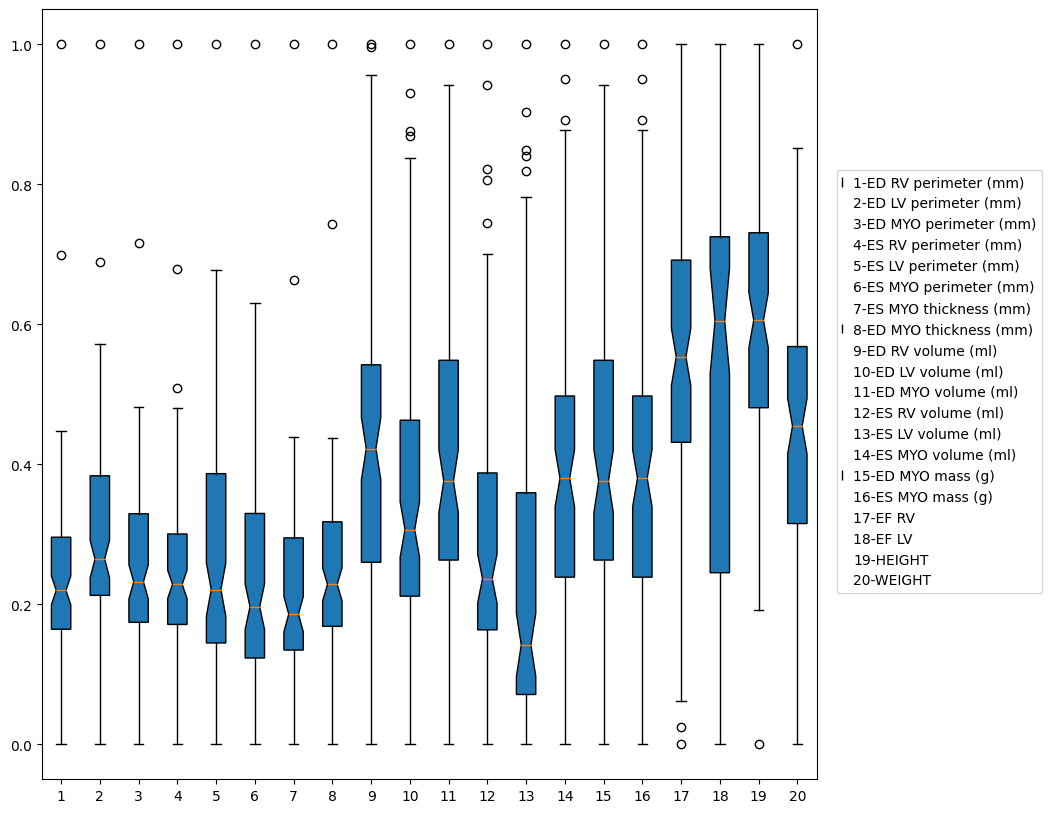

In [20]:
plt.figure(figsize=(10,10))
plt.boxplot(X_train, notch=True, patch_artist=True);
legends = [f"{i+1}-{col}" for i, col in enumerate(train_cols[1:-1])]
plt.legend(legends, loc='upper right',  bbox_to_anchor=(1.3, .8), handlelength=0, markerscale=0)

print(f"the maximum value of our train data: \n{X_train.max()}")
print(f"the minimum value of our train data: \n{X_train.min()}")

the maximum value of our test data: 
1.6049382716049378
the minimum value of our test data: 
-0.3095238095238093


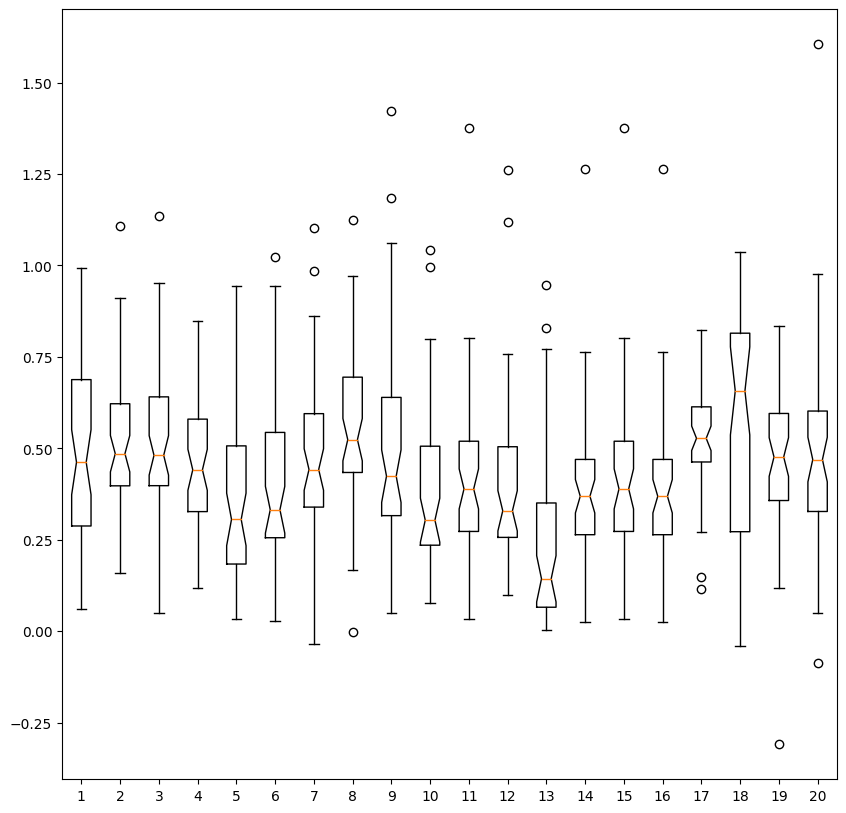

In [39]:
plt.figure(figsize=(10,10))
plt.boxplot(X_test, notch=True);
print(f"the maximum value of our test data: \n{X_test.max()}")
print(f"the minimum value of our test data: \n{X_test.min()}")

Removing features

In [15]:
drop_cols = train_cols
df_train_without_features = df_train.drop(columns=train_cols[1:9])
df_test_without_features = df_test.drop(columns=train_cols[1:9])

In [16]:
df_train_without_features.head(5)

,ED RV volume (ml),ED LV volume (ml),ED MYO volume (ml),ES RV volume (ml),ES LV volume (ml),ES MYO volume (ml),ED MYO mass (g),ES MYO mass (g),EF RV,EF LV,HEIGHT,WEIGHT,CATEGORY
0,139.721680,295.507812,164.257812,59.545898,225.610352,195.068359,165.079102,196.043701,0.573825,0.236533,184.0,95.0,2
1,94.432068,265.744400,160.433578,28.823090,188.303375,192.565155,161.235746,193.527981,0.694774,0.291412,160.0,70.0,2
2,192.333984,276.708984,191.845703,174.584961,241.088867,201.074219,192.804932,202.079590,0.092282,0.128728,165.0,77.0,2
3,106.264114,260.847092,168.452454,84.543991,226.472473,174.957275,169.294716,175.832062,0.204398,0.131781,159.0,46.0,2
4,170.463867,290.797119,201.392578,74.553223,224.094727,232.261963,202.399541,233.423273,0.562645,0.229378,165.0,77.0,2


In [17]:
df_test_without_features.head(5)

,ED RV volume (ml),ED LV volume (ml),ED MYO volume (ml),ES RV volume (ml),ES LV volume (ml),ES MYO volume (ml),ED MYO mass (g),ES MYO mass (g),EF RV,EF LV,HEIGHT,WEIGHT
0,143.329510,278.126540,153.584635,84.921052,194.309058,149.924013,154.352558,150.673633,0.407512,0.301365,167.0,89.0
1,169.334610,73.914890,42.457528,98.704197,33.127915,43.250333,42.669816,43.466585,0.417106,0.551810,137.0,35.0
2,172.412109,125.512695,113.867188,94.458008,41.748047,128.100586,114.436523,128.741089,0.452138,0.667380,167.0,116.0
3,147.985239,108.058945,119.629346,55.197728,19.925763,143.349602,120.227492,144.066350,0.627005,0.815603,160.0,98.0
4,222.480845,121.780479,95.915223,167.480013,50.810293,108.033810,96.394799,108.573980,0.247216,0.582771,174.0,64.0


In [18]:
X_test = df_test_without_features

In [19]:
#train data
cols = df_train_without_features.columns
X_train = df_train_without_features[cols[:-1]]
y_train = df_train_without_features[cols[-1]]

# Normalization
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

## ML Classification

A good way to see which features are importants is training a decision tree.

# GridSearch

Now we can train our Random Forest Model

In [58]:
try_number = 13
RF = RandomForestClassifier()
p_grid_RF = {'n_estimators': [10,15,20,25,30,50],
             'min_samples_split':[i for i in range(0,15)],
             'min_samples_leaf': [i for i in range(0,10)],
             'max_depth': [i for i in range(2,8)],
             'max_features': ['sqrt']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring='accuracy', cv=5)
grid_RF.fit(X_train, np.ravel(y_train))

print("Best Validation Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))

y_pred = grid_RF.predict(X_test)

parameters = grid_RF.best_params_
parameters["validation_score"] = grid_RF.best_score_

df_pred = pd.DataFrame({'Id': df_raw_test['ID'].values,
                        'Category':y_pred})

df_pred.to_csv(submission_dir + f'/Submission_{try_number}.csv', index=False)

# Open file for writing
with open(submission_dir+f"params_{try_number}.json", "w") as f:
    # Convert dictionary to JSON string and write to file
    json.dump(parameters, f)


Best Validation Score: 0.9099999999999999
Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 15}


/home/kr0pt/Documents/Documentos/Telecom/IMA/ima_venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5940 fits failed out of a total of 27000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kr0pt/Documents/Documentos/Telecom/IMA/ima_venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kr0pt/Documents/Documentos/Telecom/IMA/ima_venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/kr0pt/Documents/Documentos/Telecom/IMA/ima_ven

In [31]:
y_pred_train = grid_RF.predict(X_train)
y_pred_train

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
y_pred = grid_RF.predict(X_test)
y_pred

array([2, 4, 0, 3, 4, 1, 0, 0, 0, 4, 3, 3, 4, 0, 0, 4, 2, 3, 1, 0, 4, 0,
       3, 3, 1, 2, 2, 4, 2, 0, 1, 4, 3, 2, 0, 3, 1, 3, 2, 0, 2, 1, 2, 1,
       4, 2, 0, 1, 1, 1])

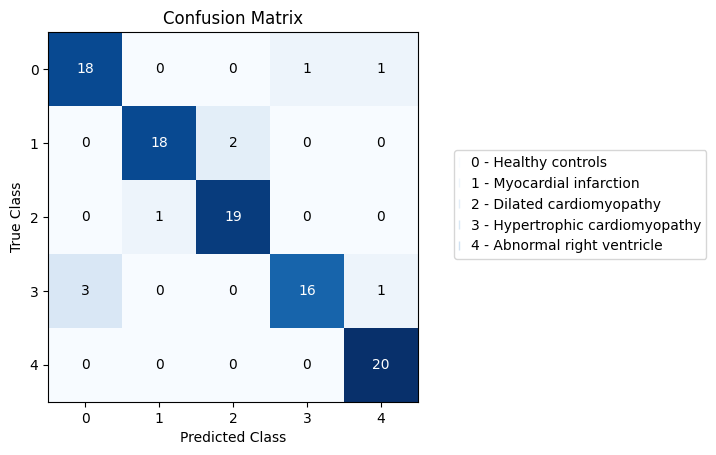

In [62]:
from sklearn.metrics import confusion_matrix

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_train, y_pred_train)

# create figure and axes objects
fig, ax = plt.subplots()

# display the confusion matrix as an image
im = ax.imshow(cm, cmap=plt.cm.Blues)

# set labels for axes
class_dict = {
    '0': 'Healthy controls',
    '1': 'Myocardial infarction',
    '2': 'Dilated cardiomyopathy',
    '3': 'Hypertrophic cardiomyopathy',
    '4': 'Abnormal right ventricle'
}

# set tick labels
ax.set_xticks(np.arange(len(class_dict)))
ax.set_yticks(np.arange(len(class_dict)))
# ax.set_xticklabels(class_dict.keys())
# ax.set_yticklabels(class_dict.keys())

# loop over data to display numbers inside the cells
for i in range(len(class_dict)):
    for j in range(len(class_dict)):
        ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > (cm.max() / 2) else "black")

# set title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Class")
ax.set_ylabel("True Class")

# add legend to the right side
handles = [plt.Rectangle((0,0),1,1, color=im.cmap(im.norm(int(i)))) for i in class_dict.keys()]
labels = [f'{k} - {v}' for k, v in class_dict.items()]
ax.legend(handles, labels, loc='upper right',  bbox_to_anchor=(1.8, .7), handlelength=0, markerscale=0)

# show the plot
plt.show()


In order to better understand our data we can do Feature Importance Analysis

In [31]:
best_params = grid_RF.best_params_
# Random Forest on noisy data
RF = RandomForestClassifier(min_samples_leaf = best_params["min_samples_leaf"],
                            max_features = best_params["max_features"],
                            n_estimators = best_params["n_estimators"])

RF.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=10)

In [32]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(10):
    print("%d. feature %d representing %s (%f)" % (f + 1, indices[f], train_cols[indices[f]], importances[indices[f]]))


1. feature 15 representing ED MYO mass (g) (0.215008)
2. feature 7 representing ES MYO thickness (mm) (0.112732)
3. feature 13 representing ES LV volume (ml) (0.104352)
4. feature 8 representing ED MYO thickness (mm) (0.077565)
5. feature 14 representing ES MYO volume (ml) (0.075404)
6. feature 3 representing ED MYO perimeter (mm) (0.055419)
7. feature 4 representing ES RV perimeter (mm) (0.054699)
8. feature 5 representing ES LV perimeter (mm) (0.053139)
9. feature 9 representing ED RV volume (ml) (0.044081)
10. feature 6 representing ES MYO perimeter (mm) (0.037360)


# Random Search

Random Search Cross Validation:

Random search allow us to narrow down the range for each hyperparameter. We can use it before use the gridsearch cross validation (exhautive search)

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 90)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 100, num = 30)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 19)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 0, stop = 20, num = 21)]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
randomgrid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Now we can train our Random Forest Model

In [104]:
RF = RandomForestClassifier(random_state=0)
rf_random  = RandomizedSearchCV(estimator=RF, 
                             param_distributions = randomgrid,
                             scoring='accuracy', n_iter = 100, cv=5,
                             verbose=2, random_state=0, n_jobs = -1)

rf_random.fit(X_train, np.ravel(y_train))

# print("Random Forest test score :",grid_RF.score(X_test,y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=48; total time=   0.1s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=48; total time=   0.1s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=48; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=68; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=68; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=68; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=68; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]},
                   random_state=0, scoring='accuracy', verbose=2)

In [105]:
print("Best Validation Score: {}".format(rf_random.best_score_))
print("Best params: {}".format(rf_random.best_params_))

Best Validation Score: 0.9473684210526315
Best params: {'n_estimators': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}


# END

In [108]:
y_pred = grid_RF.predict(X_test)
y_pred

array([1, 4, 0, 0, 4, 1, 0, 0, 4, 4, 3, 3, 4, 0, 0, 4, 2, 3, 1, 0, 4, 0,
       3, 3, 1, 2, 1, 4, 2, 4, 1, 4, 0, 2, 0, 3, 1, 3, 2, 0, 2, 1, 2, 1,
       4, 2, 0, 1, 1, 1])

In [72]:
y_pred_rf = rf_random.predict(X_test)
y_pred_rf

array([2, 4, 0, 0, 4, 1, 0, 0, 4, 4, 3, 3, 4, 0, 0, 4, 2, 3, 1, 0, 4, 4,
       3, 3, 1, 2, 1, 4, 2, 4, 1, 4, 0, 2, 0, 3, 1, 3, 2, 0, 2, 1, 1, 1,
       4, 2, 0, 1, 1, 1])

In [109]:
df_pred = pd.DataFrame({'Id': df_test['ID'].values,
                        'Category':y_pred})

In [110]:
df_pred.to_csv(submission_dir + f'/Submission_{try_number}.csv', index=False)

In [111]:
parameters = grid_RF.best_params_
parameters["train_score"] = grid_RF.best_score_

In [112]:
# Open file for writing
with open(submission_dir+f"params_{try_number}.json", "w") as f:
    # Convert dictionary to JSON string and write to file
    json.dump(parameters, f)